1. from github, get counts in TPM?. feed these to limma to get DE genes and do scoring.
2. from GEO, get counts in RPKM. In this notebook, convert that to raw data.
3. feed raw GEO data to deseq to get DE genes. score them here.

# process & score scRNA data from Compass 

In [574]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from utils import *
import joblib

In [575]:
out_file_path = './'
data_dir = out_file_path + 'data/compass_scrna/'
out_dir = out_file_path + 'compass_comparison/scrna/'
gene_signature_dir = out_file_path + 'gene_signatures/'

# 1. score results from github TPM (?)

## read results from limma
positive logFC: up in pathogenic  
negative logFC: up in non-pathogenic

In [576]:
de_genes_all = pd.read_csv(out_dir + 'de_genes_toptable_limma.csv', index_col = 0)
de_genes_all

,logFC,AveExpr,t,P.Value,adj.P.Val,B
AQP3,-6.300183,3.298555,-37.147549,6.206266e-114,5.469582e-110,247.927181
MAF,-5.521903,3.369200,-33.797761,4.946358e-104,2.179613e-100,225.645859
PDPN,-5.852255,3.395294,-29.124095,3.185392e-89,9.357620e-86,192.183156
LGALS1,-1.840688,10.117213,-22.776495,3.051426e-67,6.723055e-64,142.281577
TMEM176B,-6.677593,3.523027,-22.178156,4.545083e-65,8.011164e-62,137.337013
...,...,...,...,...,...,...
HMGXB4,0.000435,2.660498,0.001873,9.985065e-01,9.989115e-01,-7.251174
BET1L,0.000464,3.068423,0.001792,9.985715e-01,9.989115e-01,-7.251174
TYK2,-0.000182,0.651814,-0.001219,9.990283e-01,9.992551e-01,-7.251175
PLA2G4B,-0.000088,0.464821,-0.000826,9.993416e-01,9.994550e-01,-7.251176


In [577]:
p_thresh = 0.05
logfc_thresh = 0

In [578]:
de_genes = de_genes_all[de_genes_all['adj.P.Val'] < p_thresh]
de_genes_d = {}
de_genes_d['pvn'] = de_genes[de_genes['logFC'] > logfc_thresh]
de_genes_d['nvp'] = de_genes[de_genes['logFC'] < (-1 * logfc_thresh)]

In [579]:
len(de_genes_d['pvn'])

1018

In [580]:
len(de_genes_d['nvp'])

960

read in gene signatures

In [581]:
out_filename = gene_signature_dir + 'metabolism_rxn_subsystem.pickle'
subsystem_to_genes = joblib.load(out_filename)
metabolism_sig = {key: [item[0] for item in subsystem_to_genes[key]] for key in subsystem_to_genes}

In [582]:
out_filename = gene_signature_dir + 'metabolism_rxn_reaction.pickle'
reaction_sig_genes = joblib.load(out_filename)
reaction_sig = {k: v[0] for k,v in reaction_sig_genes.items()}

In [583]:
for k,v in metabolism_sig.items():
    print(f'{k}: {len(v)}')

Fatty acid oxidation: 32
Nucleotide interconversion: 102
Keratan sulfate degradation: 11
Sphingolipid metabolism: 29
Tyrosine metabolism: 34
Keratan sulfate synthesis: 15
Steroid metabolism: 25
Chondroitin synthesis: 30
Tryptophan metabolism: 36
Glycerophospholipid metabolism: 61
Inositol phosphate metabolism: 60
Folate metabolism: 11
Valine, leucine, and isoleucine metabolism: 31
Chondroitin sulfate degradation: 10
Cholesterol metabolism: 22
Arginine and Proline Metabolism: 33
Bile acid synthesis: 9
Fatty acid synthesis: 8
Glycine, serine, alanine and threonine metabolism: 23
Pyrimidine catabolism: 23
Blood group synthesis: 5
Pyruvate metabolism: 32
Aminosugar metabolism: 26
Heparan sulfate degradation: 6
Urea cycle: 17
Purine catabolism: 13
Eicosanoid metabolism: 19
Methionine and cysteine metabolism: 20
Lysine metabolism: 25
Starch and sucrose metabolism: 14
Pentose phosphate pathway: 12
NAD metabolism: 14
Vitamin A metabolism: 15
beta-Alanine metabolism: 21
Triacylglycerol synthesi

In [584]:
print(len(metabolism_sig.keys()))

81


In [585]:
for k,v in reaction_sig.items():
    print(f'{k}: {len(v)}')

13DAMPPOX: 3
2HBO: 5
2OXOADOXm: 4
34DHOXPEGOX: 6
34DHPHAMT: 1
34DHPLACOX: 4
34DHPLACOX_NADP_: 3
34DHXMANDACOX: 3
34DHXMANDACOX_NADP_: 2
34HPPOR: 1
3AIBTm: 1
3DSPHR: 1
3HAO: 1
3HBCDm: 1
3HKYNAKGAT: 2
3HLYTCL: 1
3HPCOAHYD: 1
3HXKYNOXDA: 2
3M4HDXPAC: 4
3MOX4HOXPGALDOX: 4
3MOX4HOXPGALDOX_NADP_: 4
3MOXTYROX: 2
3NTD7l: 4
3SALACBOXL: 3
3SALATAi: 1
3SALATAim: 1
41R1H2MAE12BOOX: 2
41R2A1H12BOOX: 2
42A12BOOX: 5
4HGLSDm: 1
4HOXPACDOX_NADP_: 4
4NPHSULT: 1
5ADTSTSTERONESULT: 2
5HLTDL: 1
5HOXINDACTO2OX: 1
5HOXINDACTOXm: 3
5HOXINOXDA: 2
5HTRPDOX: 1
5HXKYNDCL: 1
5HXKYNOXDA: 2
A4GALTc: 1
A4GALTg: 1
AACOAT: 1
AACTOOR: 1
AATAi: 1
ABTArm: 1
ABUTD: 1
ACACT10m: 3
ACACT1x: 1
ACACT4p: 1
ACACT5p: 1
ACACT6p: 1
ACACT7p: 1
ACACT8p: 1
ACACT9p: 1
ACCOACm: 1
ACCOAL: 1
ACCOALm: 2
ACGAM2E: 1
ACGAM6PSi: 1
ACGAMK: 1
ACGAMPM: 1
ACGPID: 1
ACGSm: 1
ACHEe: 1
ACNAM9PL: 1
ACNAM9PL2: 1
ACNAMPH: 3
ACOAD10m: 2
ACOAD1fm: 7
ACOAD8m: 1
ACOAD9m: 2
ACOAO7p: 1
ACOATA: 1
ACODA: 1
ACOX22x: 1
ACOX2x: 1
ACP1_FMN_: 4
ACS: 2
ACS2: 2
ACSm: 1

In [586]:
print(len(reaction_sig.keys()))

1292


In [587]:
# read in scRNA data
compass_data = pd.read_csv(data_dir + 'github_data/linear_gene_expression_matrix.tsv', sep = '\t', index_col = 0) # this is library size normalized already
metadata = pd.read_csv(data_dir + 'github_data/cell_metadata.csv')
#samples = list(set([i[:-9] for i in compass_data.columns]))

In [588]:
n_genes_total = len(compass_data.index)
n_genes_total

8813

In [589]:
de_genes_d['pvn']

,logFC,AveExpr,t,P.Value,adj.P.Val,B
TIGIT,4.967554,3.907939,18.365159,6.267043e-51,3.945103e-48,105.129481
IL22,7.627100,4.137263,17.747014,1.319564e-48,7.752880e-46,99.832944
TNFSF8,3.540967,2.169876,16.699485,1.154186e-44,6.357400e-42,90.845153
PDZK1IP1,5.427555,3.932362,16.585375,3.101253e-44,1.518408e-41,89.866303
EGFR,3.698484,1.864550,14.494723,2.068453e-36,7.291712e-34,72.024131
...,...,...,...,...,...,...
ZFP566,0.660177,1.587015,2.557505,1.103691e-02,4.939986e-02,-4.021428
TMLHE,0.354578,0.523122,2.556736,1.106081e-02,4.945656e-02,-4.023349
DCUN1D4,0.413077,0.552865,2.555095,1.111193e-02,4.963480e-02,-4.027445
MTHFR,0.405404,0.687422,2.554832,1.112014e-02,4.964630e-02,-4.028101


In [590]:
de_genes_d['nvp']

,logFC,AveExpr,t,P.Value,adj.P.Val,B
AQP3,-6.300183,3.298555,-37.147549,6.206266e-114,5.469582e-110,247.927181
MAF,-5.521903,3.369200,-33.797761,4.946358e-104,2.179613e-100,225.645859
PDPN,-5.852255,3.395294,-29.124095,3.185392e-89,9.357620e-86,192.183156
LGALS1,-1.840688,10.117213,-22.776495,3.051426e-67,6.723055e-64,142.281577
TMEM176B,-6.677593,3.523027,-22.178156,4.545083e-65,8.011164e-62,137.337013
...,...,...,...,...,...,...
ARF4,-0.370043,6.941361,-2.557214,1.104595e-02,4.941520e-02,-4.022155
CALM3,-0.242958,5.668878,-2.555869,1.108779e-02,4.955208e-02,-4.025513
WDR76,-0.433569,3.409969,-2.554548,1.112904e-02,4.965368e-02,-4.028812
TPP1,-0.636203,2.505325,-2.552760,1.118507e-02,4.986039e-02,-4.033272


# subsystem scoring

In [591]:
all_genes = list(compass_data.index)
overlapping_terms, n_removed_terms = get_overlapping_met_genes(metabolism_sig, all_genes, verb = True)

Fatty acid oxidation	original: 32 | overlapping: 19 | removed: 13
Nucleotide interconversion	original: 102 | overlapping: 52 | removed: 50
Keratan sulfate degradation	original: 11 | overlapping: 10 | removed: 1
Sphingolipid metabolism	original: 29 | overlapping: 17 | removed: 12
Tyrosine metabolism	original: 34 | overlapping: 14 | removed: 20
Keratan sulfate synthesis	original: 15 | overlapping: 7 | removed: 8
Steroid metabolism	original: 25 | overlapping: 6 | removed: 19
Chondroitin synthesis	original: 30 | overlapping: 14 | removed: 16
Tryptophan metabolism	original: 36 | overlapping: 16 | removed: 20
Glycerophospholipid metabolism	original: 61 | overlapping: 32 | removed: 29
Inositol phosphate metabolism	original: 60 | overlapping: 35 | removed: 25
Folate metabolism	original: 11 | overlapping: 6 | removed: 5
Valine, leucine, and isoleucine metabolism	original: 31 | overlapping: 27 | removed: 4
Chondroitin sulfate degradation	original: 10 | overlapping: 8 | removed: 2
Cholesterol met

(array([ 2.,  1.,  4.,  5., 10., 18.,  8.,  9.,  6., 18.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

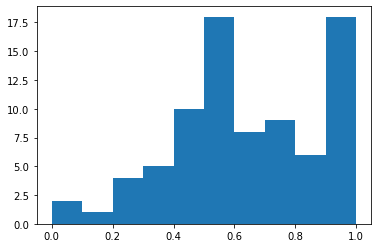

In [592]:
prop_removed = {}
for k,v in n_removed_terms.items():
    prop_removed[k] = (len(metabolism_sig[k]) - v)/len(metabolism_sig[k])
plt.hist(prop_removed.values())

(0.0, 100.0)

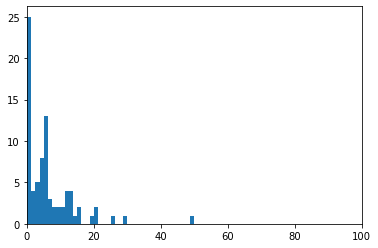

In [593]:
plt.hist(n_removed_terms.values(), bins = 40)
plt.xlim(0,100)

In [594]:
min_prop = 0.7
min_length = 1

overlapping_terms_filter = {}
for k,v in overlapping_terms.items():
    if (len(v) >= min_length) & (prop_removed[k] > min_prop):
        overlapping_terms_filter[k] = v


In [186]:
#pd.Series(overlapping_terms_filter.keys()).to_csv(out_dir + 'subsystem_term_names.csv')

(array([30., 29., 10.,  7.,  1.,  1.,  1.,  0.,  0.,  2.]),
 array([ 0. ,  5.6, 11.2, 16.8, 22.4, 28. , 33.6, 39.2, 44.8, 50.4, 56. ]),
 <BarContainer object of 10 artists>)

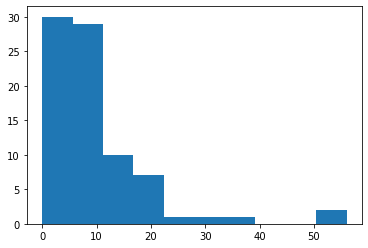

In [595]:
plt.hist([len(v) for v in overlapping_terms.values()])

(array([17.,  7.,  5.,  2.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([ 1. ,  6.5, 12. , 17.5, 23. , 28.5, 34. , 39.5, 45. , 50.5, 56. ]),
 <BarContainer object of 10 artists>)

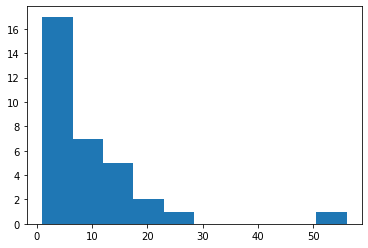

In [596]:
plt.hist([len(v) for v in overlapping_terms_filter.values()])

In [597]:
print(len(overlapping_terms.keys()))

81


In [598]:
print(len(overlapping_terms_filter.keys()))

33


In [599]:
de_genes

,logFC,AveExpr,t,P.Value,adj.P.Val,B
AQP3,-6.300183,3.298555,-37.147549,6.206266e-114,5.469582e-110,247.927181
MAF,-5.521903,3.369200,-33.797761,4.946358e-104,2.179613e-100,225.645859
PDPN,-5.852255,3.395294,-29.124095,3.185392e-89,9.357620e-86,192.183156
LGALS1,-1.840688,10.117213,-22.776495,3.051426e-67,6.723055e-64,142.281577
TMEM176B,-6.677593,3.523027,-22.178156,4.545083e-65,8.011164e-62,137.337013
...,...,...,...,...,...,...
MTHFR,0.405404,0.687422,2.554832,1.112014e-02,4.964630e-02,-4.028101
WDR76,-0.433569,3.409969,-2.554548,1.112904e-02,4.965368e-02,-4.028812
ZNF512B,0.530032,2.145423,2.554419,1.113306e-02,4.965368e-02,-4.029133
TPP1,-0.636203,2.505325,-2.552760,1.118507e-02,4.986039e-02,-4.033272


In [600]:
def get_hypergeometric_results_compass_data(de_genes, metabolism, M = n_genes_total, p_thresh = p_thresh, logfc_thresh = logfc_thresh):
    res = {k: {} for k in ['pvn', 'nvp']}
    for key in ['pvn', 'nvp']:
        df = de_genes.copy()
        df = df[df['adj.P.Val'] < p_thresh]
        if key == 'pvn':
            df = df[df['logFC'] > logfc_thresh]
        else:
            df = df[df['logFC'] < (-1 * logfc_thresh)]
            
        df['genes'] = df.index.str.upper()
        df_genes = set(df['genes'])
        N = len(df) # length of DE genes
        for k,v in metabolism.items():
            n = len(v) # number of met genes
            x = len(df_genes.intersection(v))
            pct_overlap = x/(N+n)

            if pct_overlap > 0:
                p_val = hypergeometric_test(total_genes_expressed=M, n_genes_of_interest=n, 
                                            n_genes_picked=N, n_overlap=x)
                res[key][k] = p_val
#             else:
#                 res[key][k] = 1
    return res

In [601]:
def format_hypergeom_res(res):
    res_df = pd.DataFrame.from_dict(res)
    res_df['term'] = res_df.index
    res_df['padj_pvn'] = adjust_p_value_bh(res_df['pvn'].values)
    res_df['padj_nvp'] = adjust_p_value_bh(res_df['nvp'].values)
    res_df['q_pvn'] = adjust_p_value_qval(res_df['pvn'].values,pi_0=None)
    res_df['q_nvp'] = adjust_p_value_qval(res_df['nvp'].values,pi_0=None)
    
    cols_pvn = ['pvn', 'term', 'padj_pvn', 'q_pvn']
    res_df_format = res_df[cols_pvn].reset_index(drop = True).copy()
    res_df_format.columns = ['p', 'term', 'padj', 'q']
    res_df_format = res_df_format[['term', 'p', 'padj', 'q']]
    res_pvn = res_df_format.copy()
    
    cols_nvp = ['nvp', 'term', 'padj_nvp', 'q_nvp']
    res_df_format = res_df[cols_nvp].reset_index(drop = True).copy()
    res_df_format.columns = ['p', 'term', 'padj', 'q']
    res_df_format = res_df_format[['term', 'p', 'padj', 'q']]
    res_nvp = res_df_format.copy()
    
    return res_pvn, res_nvp

In [602]:
res_pvn_all, res_nvp_all = format_hypergeom_res(get_hypergeometric_results_compass_data(de_genes, overlapping_terms_filter))

In [195]:
res_pvn_all

,term,p,padj,q
0,"Valine, leucine, and isoleucine metabolism",0.618053,NaN,0.0
1,Chondroitin sulfate degradation,0.625580,NaN,0.0
2,Aminosugar metabolism,0.193334,NaN,0.0
3,Methionine and cysteine metabolism,0.246453,NaN,0.0
4,Lysine metabolism,0.378889,NaN,0.0
5,Pentose phosphate pathway,0.741023,NaN,0.0
6,NAD metabolism,0.707158,NaN,0.0
7,Selenoamino acid metabolism,0.411549,NaN,0.0
8,Pyrimidine synthesis,0.521307,NaN,0.0
9,Purine synthesis,0.005618,NaN,0.0


In [605]:
res_nvp_all

,term,p,padj,q
0,"Valine, leucine, and isoleucine metabolism",NaN,NaN,NaN
1,Chondroitin sulfate degradation,NaN,NaN,NaN
2,Aminosugar metabolism,0.900668,NaN,0.818789
3,Methionine and cysteine metabolism,NaN,NaN,NaN
4,Lysine metabolism,0.888495,NaN,0.818789
5,Pentose phosphate pathway,0.719005,NaN,0.818789
6,NAD metabolism,0.086283,NaN,0.784391
7,Selenoamino acid metabolism,0.749652,NaN,0.818789
8,Pyrimidine synthesis,NaN,NaN,NaN
9,Purine synthesis,NaN,NaN,NaN


In [606]:
# res_nvp_all.to_csv(out_dir + 'results_Th17n_v_p_compass_rxns_q.csv')
# res_pvn_all.to_csv(out_dir + 'results_Th17p_v_n_compass_rxns_q.csv')

# reaction scoring

In [607]:
all_genes = list(compass_data.index)
overlapping_terms_rxn, n_removed_terms_rxn = get_overlapping_met_genes(reaction_sig, all_genes, verb = True)

13DAMPPOX	original: 3 | overlapping: 1 | removed: 2
2HBO	original: 5 | overlapping: 3 | removed: 2
2OXOADOXm	original: 4 | overlapping: 4 | removed: 0
34DHOXPEGOX	original: 6 | overlapping: 3 | removed: 3
34DHPHAMT	original: 1 | overlapping: 1 | removed: 0
34DHPLACOX	original: 4 | overlapping: 0 | removed: 4
34DHPLACOX_NADP_	original: 3 | overlapping: 0 | removed: 3
34DHXMANDACOX	original: 3 | overlapping: 0 | removed: 3
34DHXMANDACOX_NADP_	original: 2 | overlapping: 0 | removed: 2
34HPPOR	original: 1 | overlapping: 0 | removed: 1
3AIBTm	original: 1 | overlapping: 0 | removed: 1
3DSPHR	original: 1 | overlapping: 1 | removed: 0
3HAO	original: 1 | overlapping: 1 | removed: 0
3HBCDm	original: 1 | overlapping: 1 | removed: 0
3HKYNAKGAT	original: 2 | overlapping: 0 | removed: 2
3HLYTCL	original: 1 | overlapping: 0 | removed: 1
3HPCOAHYD	original: 1 | overlapping: 1 | removed: 0
3HXKYNOXDA	original: 2 | overlapping: 1 | removed: 1
3M4HDXPAC	original: 4 | overlapping: 0 | removed: 4
3MOX4HOXP

(array([351.,   6.,  20.,  66.,   5., 130.,  20.,  43.,  15., 636.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

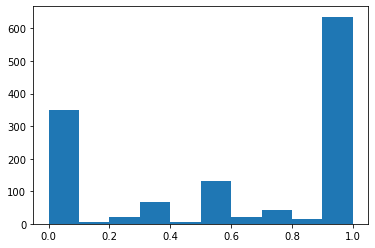

In [608]:
prop_removed_rxn = {}
for k,v in n_removed_terms_rxn.items():
    prop_removed_rxn[k] = (len(reaction_sig[k]) - v)/len(reaction_sig[k])
plt.hist(prop_removed_rxn.values())

(array([1.048e+03, 1.660e+02, 4.200e+01, 2.200e+01, 6.000e+00, 3.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 3.000e+00]),
 array([ 0. ,  1.4,  2.8,  4.2,  5.6,  7. ,  8.4,  9.8, 11.2, 12.6, 14. ]),
 <BarContainer object of 10 artists>)

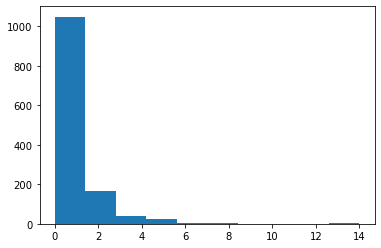

In [610]:
plt.hist(n_removed_terms_rxn.values(), bins = 10)
#plt.xlim(0,100)

In [157]:
# min_prop = 0.7
# min_length = 1

In [611]:
overlapping_terms_filter_rxn = {}
for k,v in overlapping_terms_rxn.items():
    if (len(v) >= min_length) & (prop_removed_rxn[k] > min_prop):
        overlapping_terms_filter_rxn[k] = v

(array([1.196e+03, 9.100e+01, 2.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0. ,  3.7,  7.4, 11.1, 14.8, 18.5, 22.2, 25.9, 29.6, 33.3, 37. ]),
 <BarContainer object of 10 artists>)

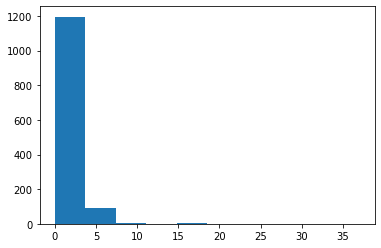

In [612]:
plt.hist([len(v) for v in overlapping_terms_rxn.values()])

(array([676.,  13.,   2.,   0.,   2.,   0.,   0.,   0.,   0.,   1.]),
 array([ 1. ,  4.6,  8.2, 11.8, 15.4, 19. , 22.6, 26.2, 29.8, 33.4, 37. ]),
 <BarContainer object of 10 artists>)

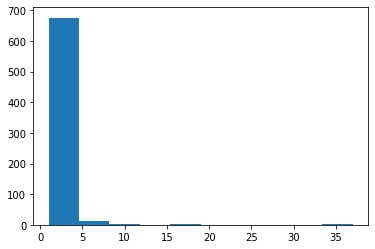

In [613]:
plt.hist([len(v) for v in overlapping_terms_filter_rxn.values()])

In [614]:
print(len(overlapping_terms_rxn.keys()))

1292


In [615]:
print(len(overlapping_terms_filter_rxn.keys()))

694


In [616]:
res_pvn_all_rxn, res_nvp_all_rxn = format_hypergeom_res(get_hypergeometric_results_compass_data(de_genes, overlapping_terms_filter_rxn))

In [617]:
# res_nvp_all.to_csv(out_dir + 'results_Th17n_v_p_compass_rxns_q_rxn.csv')
# res_pvn_all.to_csv(out_dir + 'results_Th17p_v_n_compass_rxns_q_rxn.csv')

# 2 score DE genes from raw + deseq

In [651]:
de_genes_geo = pd.read_csv(out_dir + 'deseq_genes_Th17p_vs_Th17n_round_from_RPKM_geo.csv', index_col = 0)
de_genes_geo

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ZFP865,2265.351466,-0.995462,1.604878,-0.620273,0.535078,0.915734
MED11,134212.469636,-0.044678,0.177925,-0.251105,0.801733,0.974451
FRMD8,44641.664666,-1.199519,0.465422,-2.577270,0.009958,0.090997
BTAF1,68708.610314,0.477448,0.379883,1.256829,0.208815,0.666442
ADAMTS13,5844.141623,0.277087,0.314364,0.881421,0.378090,0.833154
...,...,...,...,...,...,...
CLINT1,192607.787383,0.150584,0.296467,0.507927,0.611505,0.937909
FANCM,39206.984883,-0.478272,0.545743,-0.876367,0.380830,0.835982
ICAM1,82611.870257,0.053925,0.544268,0.099077,0.921077,0.993772
RNF145,48622.328900,-0.174097,0.533968,-0.326044,0.744391,0.965765


In [652]:
de_genes_geo[de_genes_geo['padj'] < 0.05]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
PTPN14,2.844815e+03,30.000000,1.738825,17.253032,1.061788e-66,4.050722e-64
CD6,7.034415e+05,0.406020,0.117357,3.459695,5.407884e-04,8.170724e-03
CRTC3,3.815826e+04,-2.138462,0.660262,-3.238811,1.200292e-03,1.630545e-02
CST7,7.975342e+04,1.383576,0.412964,3.350351,8.070921e-04,1.163738e-02
TMBIM6,2.095204e+06,-0.317062,0.064931,-4.883073,1.044453e-06,2.678716e-05
...,...,...,...,...,...,...
NPFF,3.321830e+01,27.361429,2.892644,9.458969,3.109938e-21,1.645930e-19
RUNX3,1.744993e+05,-0.653107,0.215968,-3.024087,2.493850e-03,2.980900e-02
PSME2,6.036872e+05,0.360279,0.091219,3.949621,7.827497e-05,1.471634e-03
MS4A6D,2.906342e+02,30.000000,2.892608,10.371265,3.350583e-25,2.617479e-23


In [653]:
p_thresh = 0.05
logfc_thresh = 0

read in gene signatures

In [654]:
out_filename = gene_signature_dir + 'metabolism_rxn_subsystem.pickle'
subsystem_to_genes = joblib.load(out_filename)
metabolism_sig = {key: [item[0] for item in subsystem_to_genes[key]] for key in subsystem_to_genes}

out_filename = gene_signature_dir + 'metabolism_rxn_reaction.pickle'
reaction_sig_genes = joblib.load(out_filename)
reaction_sig = {k: v[0] for k,v in reaction_sig_genes.items()}

In [655]:
print(len(metabolism_sig.keys()))
for k,v in metabolism_sig.items():
    print(f'{k}: {len(v)}')

81
Fatty acid oxidation: 32
Nucleotide interconversion: 102
Keratan sulfate degradation: 11
Sphingolipid metabolism: 29
Tyrosine metabolism: 34
Keratan sulfate synthesis: 15
Steroid metabolism: 25
Chondroitin synthesis: 30
Tryptophan metabolism: 36
Glycerophospholipid metabolism: 61
Inositol phosphate metabolism: 60
Folate metabolism: 11
Valine, leucine, and isoleucine metabolism: 31
Chondroitin sulfate degradation: 10
Cholesterol metabolism: 22
Arginine and Proline Metabolism: 33
Bile acid synthesis: 9
Fatty acid synthesis: 8
Glycine, serine, alanine and threonine metabolism: 23
Pyrimidine catabolism: 23
Blood group synthesis: 5
Pyruvate metabolism: 32
Aminosugar metabolism: 26
Heparan sulfate degradation: 6
Urea cycle: 17
Purine catabolism: 13
Eicosanoid metabolism: 19
Methionine and cysteine metabolism: 20
Lysine metabolism: 25
Starch and sucrose metabolism: 14
Pentose phosphate pathway: 12
NAD metabolism: 14
Vitamin A metabolism: 15
beta-Alanine metabolism: 21
Triacylglycerol synth

In [656]:
print(len(reaction_sig.keys()))
for k,v in reaction_sig.items():
    print(f'{k}: {len(v)}')

1292
13DAMPPOX: 3
2HBO: 5
2OXOADOXm: 4
34DHOXPEGOX: 6
34DHPHAMT: 1
34DHPLACOX: 4
34DHPLACOX_NADP_: 3
34DHXMANDACOX: 3
34DHXMANDACOX_NADP_: 2
34HPPOR: 1
3AIBTm: 1
3DSPHR: 1
3HAO: 1
3HBCDm: 1
3HKYNAKGAT: 2
3HLYTCL: 1
3HPCOAHYD: 1
3HXKYNOXDA: 2
3M4HDXPAC: 4
3MOX4HOXPGALDOX: 4
3MOX4HOXPGALDOX_NADP_: 4
3MOXTYROX: 2
3NTD7l: 4
3SALACBOXL: 3
3SALATAi: 1
3SALATAim: 1
41R1H2MAE12BOOX: 2
41R2A1H12BOOX: 2
42A12BOOX: 5
4HGLSDm: 1
4HOXPACDOX_NADP_: 4
4NPHSULT: 1
5ADTSTSTERONESULT: 2
5HLTDL: 1
5HOXINDACTO2OX: 1
5HOXINDACTOXm: 3
5HOXINOXDA: 2
5HTRPDOX: 1
5HXKYNDCL: 1
5HXKYNOXDA: 2
A4GALTc: 1
A4GALTg: 1
AACOAT: 1
AACTOOR: 1
AATAi: 1
ABTArm: 1
ABUTD: 1
ACACT10m: 3
ACACT1x: 1
ACACT4p: 1
ACACT5p: 1
ACACT6p: 1
ACACT7p: 1
ACACT8p: 1
ACACT9p: 1
ACCOACm: 1
ACCOAL: 1
ACCOALm: 2
ACGAM2E: 1
ACGAM6PSi: 1
ACGAMK: 1
ACGAMPM: 1
ACGPID: 1
ACGSm: 1
ACHEe: 1
ACNAM9PL: 1
ACNAM9PL2: 1
ACNAMPH: 3
ACOAD10m: 2
ACOAD1fm: 7
ACOAD8m: 1
ACOAD9m: 2
ACOAO7p: 1
ACOATA: 1
ACODA: 1
ACOX22x: 1
ACOX2x: 1
ACP1_FMN_: 4
ACS: 2
ACS2: 2
AC

In [657]:
# read in scRNA data
compass_data_geo = pd.read_csv(data_dir + 'geo_data/raw_counts_from_rpkm.csv', sep = ',', index_col = 0) # this is raw
metadata_geo = pd.read_csv(data_dir + 'geo_data/all_meta.csv')
#samples = list(set([i[:-9] for i in compass_data.columns]))

In [658]:
print(compass_data_geo.shape)
compass_data_geo.head()

(9187, 290)


,SRR2921289,SRR2921321,SRR2921373,SRR2921293,SRR2921400,SRR2921399,SRR2921344,SRR2921409,SRR2921402,SRR2921381,...,SRR2921590,SRR2921624,SRR2921572,SRR2921711,SRR2921614,SRR2921699,SRR2921671,SRR2921633,SRR2921638,SRR2921619
ZFP865,3408.242854,0.000000,0.000000,0.000000,0.000000,22147.187219,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,7645.283929,0.000000,0.000000,0.000000,6983.059745,0.000000,0.000000
MED11,40057.837751,226610.302730,69345.841127,140862.782268,40225.608707,9662.545547,209007.845844,29722.491487,132380.973927,40898.045270,...,114948.318531,147938.207298,531685.055525,5717.967335,219665.588633,58536.016473,174638.137684,99196.953898,348460.952877,0.000000
FRMD8,0.000000,36983.924664,0.000316,0.000000,131802.929331,73368.893106,102229.321178,0.000000,32823.507834,10364.231145,...,17435.111258,59353.562816,0.000000,25297.148677,64842.267148,8754.526580,115891.828735,3756.194939,10303.609694,954.806947
BTAF1,3044.076620,247634.101653,133423.828923,64392.850506,26806.666437,305053.648621,1506.051771,138550.182121,296232.246110,56411.326837,...,1530.124403,288545.063326,0.000000,1535.896630,15455.169566,79141.870493,10298.180608,0.000000,0.000000,4787.622342
ADAMTS13,0.000000,2397.368902,20717.937462,598.196367,12333.518928,28262.604027,7510.841655,7136.025003,20871.952261,4571.122277,...,3652.894136,0.000000,0.000000,41183.454524,1228.919312,15931.245086,3628.955841,1245.830001,1865.694547,2529.984915


In [659]:
metadata_geo.head()

,MD_SRX,cell_id,cell_type,NREADS,NALIGNED,geo
0,SRX1435513,SRR2921289,Th17p,1296320,922293,GSM1943112
1,SRX1435545,SRR2921321,Th17p,1320230,941281,GSM1943144
2,SRX1435597,SRR2921373,Th17p,2109040,1149880,GSM1943196
3,SRX1435517,SRR2921293,Th17p,1631870,1183900,GSM1943116
4,SRX1435624,SRR2921400,Th17p,1895830,1292000,GSM1943223


In [660]:
n_genes_total_geo = len(compass_data_geo.index)
n_genes_total_geo

9187

### subsystem scoring

In [661]:
all_genes_geo = list(compass_data_geo.index)
overlapping_terms_geo, n_removed_terms_geo = get_overlapping_met_genes(metabolism_sig, all_genes_geo, verb = False)

(array([ 2.,  1.,  3.,  4.,  5., 15., 11.,  9., 10., 21.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

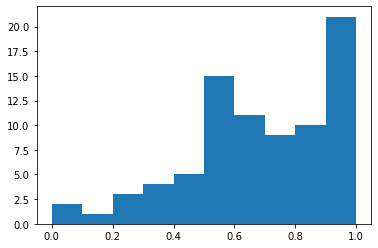

In [662]:
prop_removed_geo = {}
for k,v in n_removed_terms_geo.items():
    prop_removed_geo[k] = (len(metabolism_sig[k]) - v)/len(metabolism_sig[k])
plt.hist(prop_removed_geo.values())

(0.0, 100.0)

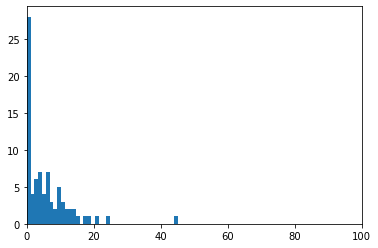

In [663]:
plt.hist(n_removed_terms_geo.values(), bins = 40)
plt.xlim(0,100)

In [664]:
min_prop = 0.7
min_length = 1

In [665]:
overlapping_terms_filter_geo = {}
for k,v in overlapping_terms_geo.items():
    if (len(v) >= min_length) & (prop_removed_geo[k] > min_prop):
        overlapping_terms_filter_geo[k] = v
    else:
        print('removed ' + k)

removed Fatty acid oxidation
removed Nucleotide interconversion
removed Sphingolipid metabolism
removed Tyrosine metabolism
removed Steroid metabolism
removed Chondroitin synthesis
removed Tryptophan metabolism
removed Glycerophospholipid metabolism
removed Cholesterol metabolism
removed Arginine and Proline Metabolism
removed Bile acid synthesis
removed Glycine, serine, alanine and threonine metabolism
removed Pyrimidine catabolism
removed Blood group synthesis
removed Pyruvate metabolism
removed Urea cycle
removed Purine catabolism
removed Eicosanoid metabolism
removed Starch and sucrose metabolism
removed NAD metabolism
removed Vitamin A metabolism
removed beta-Alanine metabolism
removed Triacylglycerol synthesis
removed Glyoxylate and dicarboxylate metabolism
removed Glutamate metabolism
removed Alanine and aspartate metabolism
removed Histidine metabolism
removed Glutathione metabolism
removed Phenylalanine metabolism
removed Galactose metabolism
removed Transport, extracellular
r

In [666]:
#pd.Series(overlapping_terms_filter.keys()).to_csv(out_dir + 'subsystem_term_names_geo.csv')

Text(0.5, 1.0, 'len of terms after filter')

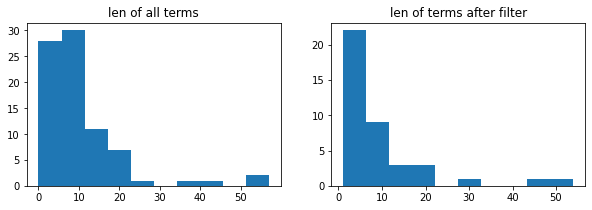

In [667]:
fig, axs = plt.subplots(1,2, figsize = (10,3))
axs[0].hist([len(v) for v in overlapping_terms_geo.values()])
axs[1].hist([len(v) for v in overlapping_terms_filter_geo.values()])
axs[0].set_title('len of all terms')
axs[1].set_title('len of terms after filter')

In [668]:
def get_hypergeometric_results_compass_data_deseq(de_genes, metabolism, M = n_genes_total, p_thresh = p_thresh, logfc_thresh = logfc_thresh):
    res = {k: {} for k in ['pvn', 'nvp']}
    for key in ['pvn', 'nvp']:
        df = de_genes.copy()
        df = df[df['padj'] < p_thresh]
        if key == 'pvn':
            df = df[df['log2FoldChange'] > logfc_thresh]
        else:
            df = df[df['log2FoldChange'] < (-1 * logfc_thresh)]
            
        df['genes'] = df.index.str.upper()
        df_genes = set(df['genes'])
        N = len(df) # length of DE genes
        for k,v in metabolism.items():
            n = len(v) # number of met genes
            x = len(df_genes.intersection(v))
            pct_overlap = x/(N+n)

            if pct_overlap > 0:
                p_val = hypergeometric_test(total_genes_expressed=M, n_genes_of_interest=n, 
                                            n_genes_picked=N, n_overlap=x)
                res[key][k] = p_val
#             else:
#                 res[key][k] = 1
    return res

In [669]:
res_pvn_all_geo, res_nvp_all_geo = format_hypergeom_res(get_hypergeometric_results_compass_data_deseq(de_genes_geo, overlapping_terms_filter_geo))

In [543]:
# res_nvp_all_geo.to_csv(out_dir + 'results_Th17n_v_p_compass_rxns_q_geo.csv')
# res_pvn_all_geo.to_csv(out_dir + 'results_Th17p_v_n_compass_rxns_q_geo.csv')

In [671]:
res_pvn_all_geo[res_pvn_all_geo['p'].notna()].sort_values('p')

,term,p,padj,q
9,C5-branched dibasic acid metabolism,0.107877,NaN,0.0
8,Purine synthesis,0.141192,NaN,0.0
5,Aminosugar metabolism,0.197486,NaN,0.0
4,Fatty acid synthesis,0.204147,NaN,0.0
11,Vitamin B2 metabolism,0.204147,NaN,0.0
2,Folate metabolism,0.262501,NaN,0.0
0,Keratan sulfate synthesis,0.342129,NaN,0.0
7,Selenoamino acid metabolism,0.390392,NaN,0.0
6,Methionine and cysteine metabolism,0.456248,NaN,0.0
12,"Transport, lysosomal",0.476584,NaN,0.0


In [672]:
res_nvp_all_geo[res_nvp_all_geo['p'].notna()].sort_values('p')

,term,p,padj,q
0,Keratan sulfate synthesis,0.140807,NaN,0.680264
16,N-glycan synthesis,0.221627,NaN,0.680264
10,Oxidative phosphorylation,0.228752,NaN,0.680264
15,Heme synthesis,0.313308,NaN,0.680264
13,Chondroitin sulfate degradation,0.431016,NaN,0.680264
7,Selenoamino acid metabolism,0.557235,NaN,0.680264
6,Methionine and cysteine metabolism,0.633188,NaN,0.680264
12,"Transport, lysosomal",0.655496,NaN,0.680264
14,Lysine metabolism,0.696131,NaN,0.680264
5,Aminosugar metabolism,0.748291,NaN,0.680264


In [673]:
r_geo = get_hypergeometric_results_compass_data_deseq(de_genes_geo, overlapping_terms_filter_geo)
#pd.DataFrame.from_dict(r_geo)

(0.0, 1.0)

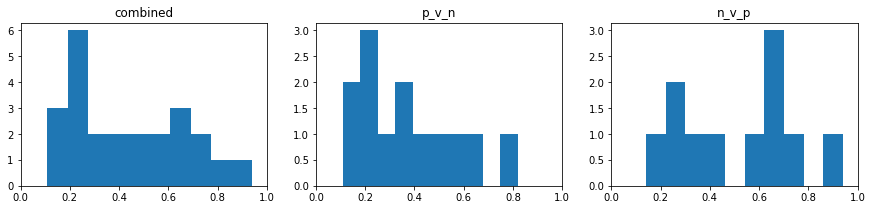

In [674]:
# combined
fig, axs = plt.subplots(1,3, figsize = (15,3))
axs[0].hist([i for s in [r_geo[k].values() for k in r_geo.keys()] for i in s])
axs[0].set_title('combined')
axs[1].hist(res_pvn_all_geo['p'])
axs[1].set_title('p_v_n')
axs[2].hist(res_nvp_all_geo['p'])
axs[2].set_title('n_v_p')
axs[0].set_xlim(0,1)
axs[1].set_xlim(0,1)
axs[2].set_xlim(0,1)

# reaction scoring

In [552]:
all_genes_geo = list(compass_data_geo.index)
overlapping_terms_rxn_geo, n_removed_terms_rxn_geo = get_overlapping_met_genes(reaction_sig, all_genes_geo, verb = False)

(array([274.,   2.,   3.,  65.,   5., 126.,  26.,  60.,  21., 710.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

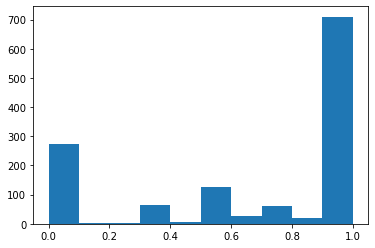

In [553]:
prop_removed_rxn_geo = {}
for k,v in n_removed_terms_rxn_geo.items():
    prop_removed_rxn_geo[k] = (len(reaction_sig[k]) - v)/len(reaction_sig[k])
plt.hist(prop_removed_rxn_geo.values())

(array([708., 384., 135.,  40.,   7.,   5.,   5.,   2.,   5.,   1.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

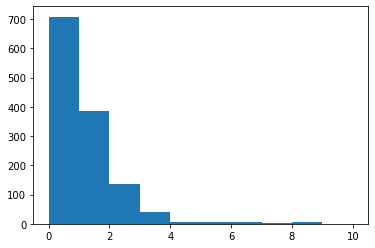

In [556]:
plt.hist(n_removed_terms_rxn_geo.values(), bins = 10)

In [557]:
min_prop = 0.7
min_length = 1

overlapping_terms_filter_rxn_geo = {}
for k,v in overlapping_terms_rxn_geo.items():
    if (len(v) >= min_length) & (prop_removed_rxn_geo[k] > min_prop):
        overlapping_terms_filter_rxn_geo[k] = v

Text(0.5, 1.0, 'len of terms after filter')

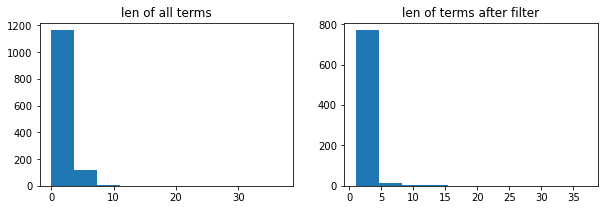

In [559]:
fig, axs = plt.subplots(1,2, figsize = (10,3))
axs[0].hist([len(v) for v in overlapping_terms_rxn_geo.values()])
axs[1].hist([len(v) for v in overlapping_terms_filter_rxn_geo.values()])
axs[0].set_title('len of all terms')
axs[1].set_title('len of terms after filter')

In [561]:
print(len(overlapping_terms_rxn_geo.keys()))

1292


In [562]:
print(len(overlapping_terms_filter_rxn_geo.keys()))

791


In [563]:
res_pvn_all_rxn_geo, res_nvp_all_rxn_geo = format_hypergeom_res(get_hypergeometric_results_compass_data_deseq(de_genes_geo, overlapping_terms_filter_rxn_geo))

In [564]:
# res_nvp_all_rxn_geo.to_csv(out_dir + 'results_Th17n_v_p_compass_rxns_q_rxn_geo.csv')
# res_pvn_all_rxn_geo.to_csv(out_dir + 'results_Th17p_v_n_compass_rxns_q_rxn_geo.csv')

In [572]:
res_nvp_all_rxn_geo[res_nvp_all_rxn_geo['p'].notna()]

,term,p,padj,q
9,ATPasel,0.655496,NaN,0.0
11,FACOAL1831,0.268901,NaN,0.0
31,NADH2_u10m,0.666395,NaN,0.0
35,RNDR1,0.010591,NaN,0.0
36,RNDR2,0.010591,NaN,0.0
...,...,...,...,...
94,S4TASE2ly,0.060706,NaN,0.0
95,S4TASE3ly,0.060706,NaN,0.0
96,S4TASE4ly,0.060706,NaN,0.0
97,S4TASE5ly,0.060706,NaN,0.0


In [573]:
res_pvn_all_rxn_geo[res_pvn_all_rxn_geo['p'].notna()]

,term,p,padj,q
0,5HTRPDOX,0.037331,NaN,0.0
1,ACGAM6PSi,0.037331,NaN,0.0
2,ACP1_FMN_,0.141192,NaN,0.0
3,ADK1m,0.073273,NaN,0.0
4,ADPGLC,0.037331,NaN,0.0
5,ADPMAN,0.037331,NaN,0.0
6,ADPRDP,0.037331,NaN,0.0
7,ADSL1,0.037331,NaN,0.0
8,ADSL2,0.037331,NaN,0.0
9,ATPasel,0.476584,NaN,0.0


(0.0, 1.0)

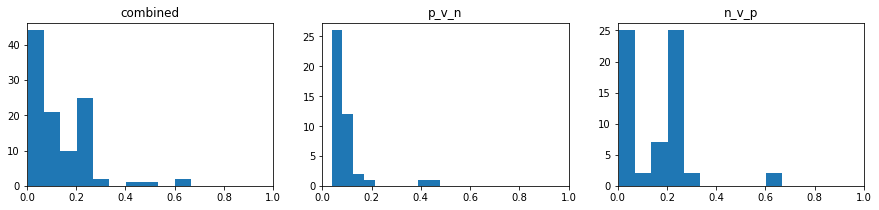

In [570]:
# combined
r_geo_rxn = get_hypergeometric_results_compass_data_deseq(de_genes_geo, overlapping_terms_filter_rxn_geo)
fig, axs = plt.subplots(1,3, figsize = (15,3))
axs[0].hist([i for s in [r_geo_rxn[k].values() for k in r_geo_rxn.keys()] for i in s])
axs[0].set_title('combined')
axs[1].hist(res_pvn_all_rxn_geo['p'])
axs[1].set_title('p_v_n')
axs[2].hist(res_nvp_all_rxn_geo['p'])
axs[2].set_title('n_v_p')
axs[0].set_xlim(0,1)
axs[1].set_xlim(0,1)
axs[2].set_xlim(0,1)

# compare the data from different sources

1. github main repo

In [7]:
data_main = pd.read_csv(data_dir + 'github_main_expression.tsv', sep = '\t')
data_main.index = data_main['Gene Sybmol']
data_main = data_main.iloc[:,1:]
data_main

,WT-d_S141_L007_R1_001,Ob-DHA-e_S154_L007_R1_001,WT-1012-c_S135_L007_R1_001,Ob-DHA-b_S132_L007_R1_001,Ob-EPA-a_S122_L007_R1_001,Ob-c_S136_L007_R1_001,Ob-1012-c_S140_L007_R1_001,WT-EPA-e_S151_L007_R1_001,WT-DHA-d_S143_L007_R1_001,WT-DHA-b_S128_L007_R1_001,...,Ob-1012-a_S125_L007_R1_001,Ob-DHA-a_S123_L007_R1_001,WT-e_S150_L007_R1_001,Ob-911-e_S155_L007_R1_001,WT-a_S116_L007_R1_001,Ob-911-d_S148_L007_R1_001,WT-1012-e_S152_L007_R1_001,WT-911-d_S144_L007_R1_001,Ob-DHA-d_S147_L007_R1_001,WT-b_S126_L007_R1_001
Gene Sybmol,,,,,,,,,,,,,,,,,,,,,
0610005C13Rik,123.68,121.70,119.02,141.19,124.24,158.64,99.35,132.06,130.61,145.98,...,189.83,123.91,121.11,188.54,138.73,110.01,135.95,135.94,128.85,119.53
0610006L08Rik,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
0610007N19Rik,0.95,1.37,2.19,0.86,2.23,1.81,1.08,1.05,0.93,1.21,...,2.91,1.40,1.10,1.57,0.68,2.47,2.05,0.35,1.54,1.18
0610007P14Rik,43.24,46.56,50.75,50.79,59.34,39.13,45.79,60.09,42.50,43.38,...,43.04,52.85,53.12,51.25,50.48,58.33,47.61,43.35,55.82,58.14
0610009B22Rik,22.17,28.00,18.27,20.64,19.53,30.55,25.72,23.19,22.61,21.77,...,23.61,23.13,25.57,25.67,29.12,17.95,18.51,18.87,27.48,20.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
n-Ty6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
n-Ty7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
n-Ty8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


2. github analysis repo

In [14]:
github_analysis = pd.read_csv(data_dir + 'github_data/linear_gene_expression_matrix.tsv', sep = '\t')
github_analysis.index = github_analysis['symbol']
github_analysis = github_analysis.iloc[:,1:]
github_analysis

,SRR2921282,SRR2921283,SRR2921284,SRR2921285,SRR2921286,SRR2921287,SRR2921288,SRR2921289,SRR2921290,SRR2921291,...,SRR2921703,SRR2921704,SRR2921705,SRR2921706,SRR2921707,SRR2921708,SRR2921709,SRR2921710,SRR2921711,SRR2921712
symbol,,,,,,,,,,,,,,,,,,,,,
EIF4G3,4.202413,8.213497,4.676238,8.335730,14.914479,2.218610,16.458903,12.597561,7.669135,1.372759,...,11.630111,1.061471,45.966113,7.326690,0.000000,63.653552,18.824913,4.692626,50.012383,2.503190
HP1BP3,20.879206,8.599123,17.840761,7.094533,12.182469,29.230658,5.467113,19.691104,19.496050,31.359563,...,57.424742,3.658751,20.493097,5.972731,0.000000,7.779188,6.712236,2.797540,24.588882,61.966887
DDOST,25.655510,20.598746,32.284522,82.526757,51.569797,153.009579,49.225370,11.878362,8.742755,34.808730,...,33.153836,26.099879,65.711937,14.730903,39.547804,41.653284,52.311439,28.572607,27.468897,20.325481
PINK1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.411237,...,0.000000,0.000000,0.000000,0.000000,3.927381,26.141552,0.000000,0.000000,0.000000,0.000000
MUL1,5.585995,2.166604,11.534226,3.960356,0.000000,0.000000,0.000000,40.854912,6.012559,20.732405,...,12.434381,5.250535,0.000000,16.210612,0.000000,0.000000,1.982427,1.604774,80.456677,12.371282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HNRNPR,4.561581,21.979348,19.718558,19.741532,9.731525,14.633289,20.694800,19.061831,4.925602,16.586117,...,29.329860,3.533125,12.450690,45.203840,8.185080,39.258815,26.851364,12.598926,45.754426,0.973390
KDM1A,12.591848,1.920278,27.662254,10.055418,67.435913,17.539543,32.220364,0.000000,27.894950,21.662813,...,150.416676,71.645686,67.683956,25.921466,19.042276,13.032104,103.819747,129.199999,69.393255,14.024448
CDC42,553.127491,563.028662,515.584239,483.035417,399.715806,501.612973,539.621440,468.810148,774.173428,620.572998,...,821.815389,1190.901010,479.573364,919.711492,624.896571,755.785961,765.726947,1221.962581,636.307925,636.865030


In [327]:
metadata = pd.read_csv(data_dir + 'github_data/cell_metadata.csv')
metadata

,cell_id,cell_type,MD_SRX,NREADS,NALIGNED,RALIGN
0,SRR2921282,Th17p,SRX1435506,637389,396663,62.2325
1,SRR2921283,Th17p,SRX1435507,1074300,732092,68.1459
2,SRR2921284,Th17p,SRX1435508,1480810,1085800,73.3252
3,SRR2921285,Th17p,SRX1435509,1374340,982010,71.4531
4,SRR2921286,Th17p,SRX1435510,1243850,921003,74.0444
...,...,...,...,...,...,...
285,SRR2921708,Th17n,SRX1435924,2500130,1701980,68.0755
286,SRR2921709,Th17n,SRX1435925,3024280,2098810,69.3988
287,SRR2921710,Th17n,SRX1435926,2853240,1622680,56.8715
288,SRR2921711,Th17n,SRX1435927,2508770,1518530,60.5291


3. GEO  
75109 is pathogenic, 75111 is non-pathogenic

In [265]:
from os import listdir
from os.path import isfile, join

**read 75109** pathogenic

In [266]:
mypath_p = data_dir + 'geo_data/GSE75109/data/'

In [314]:
# from https://www.ncbi.nlm.nih.gov/sra?linkname=bioproject_sra_all&from_uid=302459
geo_meta_p = pd.read_csv(mypath_p + '../th17_scrna_sra_accession_summary.csv')
geo_meta_p.index = geo_meta_p['Experiment Accession']
geo_meta_p['geo'] = [i.split(':')[0] for i in geo_meta_p['Experiment Title']]
geo_meta_p

,Experiment Accession,Experiment Title,Organism Name,Instrument,Submitter,Study Accession,Study Title,Sample Accession,Sample Title,"Total Size, Mb",Total RUNs,Total Spots,Total Bases,Library Name,Library Strategy,Library Source,Library Selection,geo
Experiment Accession,,,,,,,,,,,,,,,,,,
SRX1435644,SRX1435644,GSM1943243: IL1B_IL6_IL23-48h-IL17A_POS_48hr_1...,Mus musculus,Illumina Genome Analyzer II,GEO,SRP066320,Single-cell transcriptional profiling of Th17 ...,SRS1166514,NaN,399.51,1,3214210,649270420,NaN,RNA-Seq,TRANSCRIPTOMIC,cDNA,GSM1943243
SRX1435643,SRX1435643,GSM1943242: IL1B_IL6_IL23-48h-IL17A_POS_48hr_1...,Mus musculus,Illumina Genome Analyzer II,GEO,SRP066320,Single-cell transcriptional profiling of Th17 ...,SRS1166515,NaN,342.38,1,2763971,558322142,NaN,RNA-Seq,TRANSCRIPTOMIC,cDNA,GSM1943242
SRX1435642,SRX1435642,GSM1943241: IL1B_IL6_IL23-48h-IL17A_POS_48hr_1...,Mus musculus,Illumina Genome Analyzer II,GEO,SRP066320,Single-cell transcriptional profiling of Th17 ...,SRS1166517,NaN,443.63,1,3581885,723540770,NaN,RNA-Seq,TRANSCRIPTOMIC,cDNA,GSM1943241
SRX1435641,SRX1435641,GSM1943240: IL1B_IL6_IL23-48h-IL17A_POS_48hr_1...,Mus musculus,Illumina Genome Analyzer II,GEO,SRP066320,Single-cell transcriptional profiling of Th17 ...,SRS1166516,NaN,380.45,1,3064764,619082328,NaN,RNA-Seq,TRANSCRIPTOMIC,cDNA,GSM1943240
SRX1435640,SRX1435640,GSM1943239: IL1B_IL6_IL23-48h-IL17A_POS_48hr_1...,Mus musculus,Illumina Genome Analyzer II,GEO,SRP066320,Single-cell transcriptional profiling of Th17 ...,SRS1166519,NaN,218.39,1,1773696,358286592,NaN,RNA-Seq,TRANSCRIPTOMIC,cDNA,GSM1943239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRX1435510,SRX1435510,GSM1943109: IL1B_IL6_IL23-48h-IL17A_POS_48hr_1...,Mus musculus,Illumina Genome Analyzer II,GEO,SRP066320,Single-cell transcriptional profiling of Th17 ...,SRS1166645,NaN,213.59,1,1510204,377551000,NaN,RNA-Seq,TRANSCRIPTOMIC,cDNA,GSM1943109
SRX1435509,SRX1435509,GSM1943108: IL1B_IL6_IL23-48h-IL17A_POS_48hr_1...,Mus musculus,Illumina Genome Analyzer II,GEO,SRP066320,Single-cell transcriptional profiling of Th17 ...,SRS1166647,NaN,234.43,1,1659616,414904000,NaN,RNA-Seq,TRANSCRIPTOMIC,cDNA,GSM1943108
SRX1435508,SRX1435508,GSM1943107: IL1B_IL6_IL23-48h-IL17A_POS_48hr_1...,Mus musculus,Illumina Genome Analyzer II,GEO,SRP066320,Single-cell transcriptional profiling of Th17 ...,SRS1166648,NaN,255.04,1,1794657,448664250,NaN,RNA-Seq,TRANSCRIPTOMIC,cDNA,GSM1943107


In [268]:
geo_fnames_p = [f for f in listdir(mypath_p) if isfile(join(mypath_p, f))]

In [310]:
geo_all_p = {}
for g in geo_fnames_p:
    if g != 'GSE75109_RAW.tar':
        geo_all_p[g.split('_')[0]] = pd.read_csv(mypath_p + g, sep = '\t')

**read 75111** pathogenic

In [275]:
mypath_n = data_dir + 'geo_data/GSE75111/data/'

In [313]:
geo_meta_n = pd.read_csv(mypath_n + '../th17_scrna_sra_accession_summary.csv')
geo_meta_n.index = geo_meta_n['Experiment Accession']
geo_meta_n['geo'] = [i.split(':')[0] for i in geo_meta_n['Experiment Title']]
geo_meta_n

,Experiment Accession,Experiment Title,Organism Name,Instrument,Submitter,Study Accession,Study Title,Sample Accession,Sample Title,"Total Size, Mb",Total RUNs,Total Spots,Total Bases,Library Name,Library Strategy,Library Source,Library Selection,geo
Experiment Accession,,,,,,,,,,,,,,,,,,
SRX1435928,SRX1435928,GSM1943524: Tgfb1_IL6-IL17A_POS_48hr_140519_T1...,Mus musculus,Illumina Genome Analyzer II,GEO,SRP066322,Single-cell transcriptional profiling of Th17 ...,SRS1166804,NaN,427.11,1,3436286,694129772,NaN,RNA-Seq,TRANSCRIPTOMIC,cDNA,GSM1943524
SRX1435927,SRX1435927,GSM1943523: Tgfb1_IL6-IL17A_POS_48hr_140519_T1...,Mus musculus,Illumina Genome Analyzer II,GEO,SRP066322,Single-cell transcriptional profiling of Th17 ...,SRS1166805,NaN,362.13,1,2909394,587697588,NaN,RNA-Seq,TRANSCRIPTOMIC,cDNA,GSM1943523
SRX1435926,SRX1435926,GSM1943522: Tgfb1_IL6-IL17A_POS_48hr_140519_T1...,Mus musculus,Illumina Genome Analyzer II,GEO,SRP066322,Single-cell transcriptional profiling of Th17 ...,SRS1166806,NaN,409.48,1,3297116,666017432,NaN,RNA-Seq,TRANSCRIPTOMIC,cDNA,GSM1943522
SRX1435925,SRX1435925,GSM1943521: Tgfb1_IL6-IL17A_POS_48hr_140519_T1...,Mus musculus,Illumina Genome Analyzer II,GEO,SRP066322,Single-cell transcriptional profiling of Th17 ...,SRS1166807,NaN,434.28,1,3496282,706248964,NaN,RNA-Seq,TRANSCRIPTOMIC,cDNA,GSM1943521
SRX1435924,SRX1435924,GSM1943520: Tgfb1_IL6-IL17A_POS_48hr_140519_T1...,Mus musculus,Illumina Genome Analyzer II,GEO,SRP066322,Single-cell transcriptional profiling of Th17 ...,SRS1166808,NaN,359.31,1,2889908,583761416,NaN,RNA-Seq,TRANSCRIPTOMIC,cDNA,GSM1943520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRX1435782,SRX1435782,GSM1943378: Tgfb1_IL6-IL17A_POS_48hr_130118_T1...,Mus musculus,Illumina Genome Analyzer II,GEO,SRP066322,Single-cell transcriptional profiling of Th17 ...,SRS1166799,NaN,897.98,1,6730636,1339396564,NaN,RNA-Seq,TRANSCRIPTOMIC,cDNA,GSM1943378
SRX1435781,SRX1435781,GSM1943377: Tgfb1_IL6-IL17A_POS_48hr_130118_T1...,Mus musculus,Illumina Genome Analyzer II,GEO,SRP066322,Single-cell transcriptional profiling of Th17 ...,SRS1166800,NaN,596.07,1,4468285,889188715,NaN,RNA-Seq,TRANSCRIPTOMIC,cDNA,GSM1943377
SRX1435780,SRX1435780,GSM1943376: Tgfb1_IL6-IL17A_POS_48hr_130118_T1...,Mus musculus,Illumina Genome Analyzer II,GEO,SRP066322,Single-cell transcriptional profiling of Th17 ...,SRS1166801,NaN,1143.46,1,8544377,1700331023,NaN,RNA-Seq,TRANSCRIPTOMIC,cDNA,GSM1943376


In [277]:
geo_fnames_n = [f for f in listdir(mypath_n) if isfile(join(mypath_n, f))]

In [311]:
geo_all_n = {}
for g in geo_fnames_n:
    geo_all_n[g.split('_')[0]] = pd.read_csv(mypath_n + g, sep = '\t')

In [280]:
geo_all_n

[              tracking_id class_code nearest_ref_id             gene_id  \
 0      ENSMUSG00000088390          -              -  ENSMUSG00000088390   
 1      ENSMUSG00000064842          -              -  ENSMUSG00000064842   
 2      ENSMUSG00000090025          -              -  ENSMUSG00000090025   
 3      ENSMUSG00000089420          -              -  ENSMUSG00000089420   
 4      ENSMUSG00000025900          -              -  ENSMUSG00000025900   
 ...                   ...        ...            ...                 ...   
 36670  ENSMUSG00000064371          -              -  ENSMUSG00000064371   
 36671  ENSMUSG00000064372          -              -  ENSMUSG00000064372   
 36672  ENSMUSG00000064367          -              -  ENSMUSG00000064367   
 36673  ENSMUSG00000064368          -              -  ENSMUSG00000064368   
 36674  ENSMUSG00000064354          -              -  ENSMUSG00000064354   
 
       gene_short_name tss_id                 locus length coverage  FPKM  \
 0       

check that we have all samples included

In [296]:
all_srx = list(set(geo_meta_p['Experiment Accession']) | set(geo_meta_n['Experiment Accession']))
len(all_srx)

290

In [298]:
len(list(set(metadata['MD_SRX']) & set(all_srx)))

290

In [299]:
# reformat data

In [328]:
metadata.index = metadata['MD_SRX']
metadata

,cell_id,cell_type,MD_SRX,NREADS,NALIGNED,RALIGN
MD_SRX,,,,,,
SRX1435506,SRR2921282,Th17p,SRX1435506,637389,396663,62.2325
SRX1435507,SRR2921283,Th17p,SRX1435507,1074300,732092,68.1459
SRX1435508,SRR2921284,Th17p,SRX1435508,1480810,1085800,73.3252
SRX1435509,SRR2921285,Th17p,SRX1435509,1374340,982010,71.4531
SRX1435510,SRR2921286,Th17p,SRX1435510,1243850,921003,74.0444
...,...,...,...,...,...,...
SRX1435924,SRR2921708,Th17n,SRX1435924,2500130,1701980,68.0755
SRX1435925,SRR2921709,Th17n,SRX1435925,3024280,2098810,69.3988
SRX1435926,SRR2921710,Th17n,SRX1435926,2853240,1622680,56.8715


In [333]:
geo_meta_n.index = geo_meta_n['geo']
geo_meta_p.index = geo_meta_p['geo']

In [336]:
def reformat_geo_entry(key, geo_data, geo_meta, metadata):
    res = geo_data.copy()
    srx_val = geo_meta.loc[key]['Experiment Accession']
    res['MD_SRX'] = srx_val
    for c in metadata.columns:
        res[c] = metadata.loc[srx_val, c]
    res['geo'] = key
    return res

In [337]:
geo_all = [None] * len(metadata)
i=0
for k,v in geo_all_p.items():
    geo_all[i] = reformat_geo_entry(k, v, geo_meta_p, metadata)
    i+=1
for k,v in geo_all_n.items():
    geo_all[i] = reformat_geo_entry(k, v, geo_meta_n, metadata)
    i+=1

In [341]:
geo_all[0]

,tracking_id,class_code,nearest_ref_id,gene_id,gene_short_name,tss_id,locus,length,coverage,FPKM,FPKM_conf_lo,FPKM_conf_hi,FPKM_status,MD_SRX,cell_id,cell_type,NREADS,NALIGNED,RALIGN,geo
0,ENSMUSG00000064842,-,-,ENSMUSG00000064842,U6.149,-,chr1:3092096-3092206,-,-,0.0,0.0,0.0,OK,SRX1435513,SRR2921289,Th17p,1296320,922293,71.147,GSM1943112
1,ENSMUSG00000088390,-,-,ENSMUSG00000088390,U7.45,-,chr1:3668960-3669024,-,-,0.0,0.0,0.0,OK,SRX1435513,SRR2921289,Th17p,1296320,922293,71.147,GSM1943112
2,ENSMUSG00000089420,-,-,ENSMUSG00000089420,U7.107,-,chr1:3773817-3773879,-,-,0.0,0.0,0.0,OK,SRX1435513,SRR2921289,Th17p,1296320,922293,71.147,GSM1943112
3,ENSMUSG00000025900,-,-,ENSMUSG00000025900,Rp1,-,chr1:4334223-4350473,-,-,0.0,0.0,0.0,OK,SRX1435513,SRR2921289,Th17p,1296320,922293,71.147,GSM1943112
4,ENSMUSG00000090025,-,-,ENSMUSG00000090025,Gm16088,-,chr1:3044313-3044814,-,-,0.0,0.0,0.0,OK,SRX1435513,SRR2921289,Th17p,1296320,922293,71.147,GSM1943112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36670,ENSMUSG00000064368,-,-,ENSMUSG00000064368,mt-Nd6,-,chrMT:13551-14070,-,-,0.0,0.0,0.0,OK,SRX1435513,SRR2921289,Th17p,1296320,922293,71.147,GSM1943112
36671,ENSMUSG00000064369,-,-,ENSMUSG00000064369,mt-Te,-,chrMT:14070-14139,-,-,0.0,0.0,0.0,OK,SRX1435513,SRR2921289,Th17p,1296320,922293,71.147,GSM1943112
36672,ENSMUSG00000064370,-,-,ENSMUSG00000064370,mt-Cytb,-,chrMT:14144-15288,-,-,0.0,0.0,0.0,OK,SRX1435513,SRR2921289,Th17p,1296320,922293,71.147,GSM1943112
36673,ENSMUSG00000064372,-,-,ENSMUSG00000064372,mt-Tp,-,chrMT:15355-15422,-,-,0.0,0.0,0.0,OK,SRX1435513,SRR2921289,Th17p,1296320,922293,71.147,GSM1943112


In [347]:
len(geo_all)

290

In [359]:
def generate_all_counts(geo):
    cols = ['gene_short_name', 'FPKM']
    cols2 = ['MD_SRX', 'cell_id', 'cell_type', 'NREADS', 'NALIGNED', 'geo']
    counts = [None] * len(geo)
    metadata = [None] * len(geo)
    for i in range(len(geo)):
        t = geo[i][cols[1]]
        t.index = geo[i][cols[0]]
        t.name = geo[i]['cell_id'].iloc[0]
        counts[i] = t
        metadata[i] = geo[i][cols2].iloc[0]
    return counts, metadata

In [360]:
all_counts, all_meta = generate_all_counts(geo_all)

In [397]:
all_counts = pd.DataFrame([i.to_dict() for i in all_counts], index = [i.name for i in all_counts])
all_counts.columns = all_counts.columns.str.upper()
all_counts = all_counts.transpose()
all_counts

,SRR2921289,SRR2921321,SRR2921373,SRR2921293,SRR2921400,SRR2921399,SRR2921344,SRR2921409,SRR2921402,SRR2921381,...,SRR2921590,SRR2921624,SRR2921572,SRR2921711,SRR2921614,SRR2921699,SRR2921671,SRR2921633,SRR2921638,SRR2921619
U6.149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U7.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U7.107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RP1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GM16088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MT-ND6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MT-TE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MT-CYTB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MT-TP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [392]:
all_meta = pd.concat(all_meta, axis = 1).transpose()
all_meta

,MD_SRX,cell_id,cell_type,NREADS,NALIGNED,geo
0,SRX1435513,SRR2921289,Th17p,1296320,922293,GSM1943112
0,SRX1435545,SRR2921321,Th17p,1320230,941281,GSM1943144
0,SRX1435597,SRR2921373,Th17p,2109040,1149880,GSM1943196
0,SRX1435517,SRR2921293,Th17p,1631870,1183900,GSM1943116
0,SRX1435624,SRR2921400,Th17p,1895830,1292000,GSM1943223
...,...,...,...,...,...,...
0,SRX1435915,SRR2921699,Th17n,2192860,1233820,GSM1943511
0,SRX1435887,SRR2921671,Th17n,2810280,1714280,GSM1943483
0,SRX1435849,SRR2921633,Th17n,1480070,996813,GSM1943445
0,SRX1435854,SRR2921638,Th17n,1615510,1007260,GSM1943450


In [505]:
# all_meta.to_csv(data_dir + 'geo_data/all_meta.csv', index = False)

compare GEO data with github data

In [426]:
shared_genes = list(set(all_counts.index) & set(github_analysis.index))
len(shared_genes)

8205

In [398]:
all_counts

,SRR2921289,SRR2921321,SRR2921373,SRR2921293,SRR2921400,SRR2921399,SRR2921344,SRR2921409,SRR2921402,SRR2921381,...,SRR2921590,SRR2921624,SRR2921572,SRR2921711,SRR2921614,SRR2921699,SRR2921671,SRR2921633,SRR2921638,SRR2921619
U6.149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U7.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U7.107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RP1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GM16088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MT-ND6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MT-TE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MT-CYTB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MT-TP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [420]:
min_counts = 100

In [423]:
counts_filtered = all_counts[all_counts.sum(axis = 1) > min_counts]
counts_filtered

,SRR2921289,SRR2921321,SRR2921373,SRR2921293,SRR2921400,SRR2921399,SRR2921344,SRR2921409,SRR2921402,SRR2921381,...,SRR2921590,SRR2921624,SRR2921572,SRR2921711,SRR2921614,SRR2921699,SRR2921671,SRR2921633,SRR2921638,SRR2921619
ATP6V1H,82.591300,17.108800,3.79675,16.584900,40.63890,7.362230,36.24440,3.03210,70.73140,30.867100,...,65.00460,52.75530,29.48970,68.179300,37.010600,3.364650e+00,9.190280,45.05550,4.754240e+01,38.329100
MRPL15,329.189000,171.536000,19.65760,191.892000,114.76600,83.716200,185.51000,230.09300,50.49390,144.474000,...,24.30530,126.09000,157.35800,211.962000,174.268000,2.410580e+02,226.102000,282.85500,1.871360e+02,291.389000
GM9826,24.056300,34.425700,28.68990,36.086300,27.01790,87.003800,7.19428,13.62370,10.93600,17.352900,...,0.00000,21.38660,69.56030,32.633100,13.974700,5.346310e+01,38.837800,36.76260,0.000000e+00,1.770940
PCMTD1,0.871748,0.337757,0.00000,0.272687,4.63425,0.000000,0.00000,0.00000,1.23297,0.291553,...,9.90588,8.21655,0.00000,0.000000,3.544120,2.471510e+00,1.392910,0.00000,2.867190e-01,0.000000
LYPLA1,62.546600,153.015000,15.31560,85.882400,136.60800,125.297000,48.62400,66.55700,80.37580,71.841700,...,27.07690,4.89057,68.20180,0.988508,115.871000,2.387900e+00,45.481800,120.07200,4.420790e-13,79.082700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TMSB4X,2610.010000,2439.430000,806.14100,2849.110000,1418.86000,774.307000,1976.92000,1188.49000,1194.76000,1036.610000,...,10264.60000,4711.85000,1741.02000,2381.440000,3888.960000,2.109510e+03,2491.610000,3907.72000,2.321010e+03,3357.230000
HCCS,0.000000,3.258000,9.55941,9.539200,3.29721,4.274790,4.73186,8.20269,1.86664,7.783130,...,1.28418,9.87708,4.19147,1.498660,0.339561,4.695850e-01,11.919900,5.26612,1.068740e+01,0.364224
MID1,0.000000,0.000000,14.04050,0.000000,0.00000,0.164236,0.00000,34.57030,4.84169,60.514900,...,0.00000,0.00000,0.00000,14.181400,4.033470,1.967950e+00,0.817464,0.00000,0.000000e+00,0.000000
G530011O06RIK,0.000000,1.187220,1.80809,0.000000,0.00000,0.000000,0.00000,3.92297,0.00000,21.778700,...,0.00000,0.00000,13.45340,2.289070,0.000000,1.363140e-42,0.295789,0.00000,0.000000e+00,0.000000


In [507]:
#counts_filtered.to_csv(data_dir + 'geo_data/counts_filtered.csv', index = True)

## convert FPKM to raw
raw -> FPKM  
1. count total reads and divide by 1,000,000 -> scaling factor
2. divide read counts by scaling factor -> reads per million
3. divide RPM by gene length -> RPKM
  
gene lengths from: R package TxDb.Mmusculus.UCSC.mm9.knownGene  
convert gene ids from: https://www.syngoportal.org/convert

In [448]:
gene_lengths = pd.read_csv(data_dir + 'geo_data/gene_lengths_mm9.csv')
gene_lengths.columns = ['gene_id', 'length']
gene_lengths

,gene_id,length
0,100009600,1842
1,100009609,2538
2,100009614,553
3,100012,1854
4,100017,2820
...,...,...
21756,99889,3687
21757,99890,5511
21758,99899,2908
21759,99929,4154


In [437]:
#gene_lengths['gene_id'].to_csv(data_dir + 'geo_data/gene_lengths_mm9_id_list.csv', index = False)

In [452]:
gene_id_names_convert = pd.read_csv(data_dir + 'geo_data/idmap.csv')
gene_id_names_convert = gene_id_names_convert[gene_id_names_convert['symbol'].notna()]
gene_id_names_convert.index = gene_id_names_convert['query']
gene_id_names_convert

,query,entrezgene,name,symbol,alias,taxid,MGI
query,,,,,,,
66050,66050,66050.0,RIKEN cDNA 0610009B22 gene,0610009B22Rik,NaN,10090.0,MGI:1913300
104457,104457,104457.0,RIKEN cDNA 0610010K14 gene,0610010K14Rik,"1110020A23Rik, Bap18",10090.0,MGI:1915609
106264,106264,106264.0,RIKEN cDNA 0610012G03 gene,0610012G03Rik,NaN,10090.0,MGI:1913301
68364,68364,68364.0,RIKEN cDNA 0610030E20 gene,0610030E20Rik,"1500031N04Rik, 2810411C16Rik",10090.0,MGI:1915614
70345,70345,70345.0,RIKEN cDNA 0610038B21 gene,0610038B21Rik,NaN,10090.0,MGI:1917595
...,...,...,...,...,...,...,...
22793,22793,22793.0,zyxin,Zyx,9530098H06Rik,10090.0,MGI:103072
195018,195018,195018.0,"zinc finger, ZZ-type with EF hand domain 1",Zzef1,"8430405D05Rik, C130099L13Rik, NSPA, mKIAA0399",10090.0,MGI:2444286
108946,108946,108946.0,"zinc finger, ZZ domain containing 3",Zzz3,"3110065C23Rik, 6430567E01Rik",10090.0,MGI:1920453


In [446]:
shared_gene_convert = list(set(gene_lengths['gene_id']) & set(gene_id_names_convert['query']))

In [455]:
gene_lengths.index = gene_lengths['gene_id']
gene_lengths = gene_lengths.loc[shared_gene_convert]

In [453]:
gene_lengths['symbol'] = gene_id_names_convert.loc[shared_gene_convert]['symbol'].str.upper()

In [456]:
gene_lengths

,gene_id,length,symbol
gene_id,,,
100270707,100270707,1878,GM14379
100270744,100270744,3520,BTBD18
394252,394252,1164,SERPINB3D
394430,394430,3242,UGT1A10
394432,394432,3294,UGT1A7C
...,...,...,...
654820,654820,2380,G530011O06RIK
654821,654821,2220,GCNT7
654822,654822,2906,D330041H03RIK


In [457]:
#gene_lengths.to_csv(data_dir + 'geo_data/gene_lengths_named.csv', index = False)

## do conversion

In [ ]:
1. count total reads and divide by 1,000,000 -> scaling factor
2. divide read counts by scaling factor -> reads per million
3. divide RPM by gene length -> RPKM

Step 1: multiply RPKM by gene length

In [468]:
#gene_lengths = pd.read_csv(data_dir + 'geo_data/gene_lengths_named.csv', index = False)
gene_lengths.index = gene_lengths['symbol']

In [ ]:
#counts_filtered = pd.read_csv(data_dir + 'geo_data/counts_filtered.csv', index = False, index_col = 0)

In [458]:
counts_filtered

,SRR2921289,SRR2921321,SRR2921373,SRR2921293,SRR2921400,SRR2921399,SRR2921344,SRR2921409,SRR2921402,SRR2921381,...,SRR2921590,SRR2921624,SRR2921572,SRR2921711,SRR2921614,SRR2921699,SRR2921671,SRR2921633,SRR2921638,SRR2921619
ATP6V1H,82.591300,17.108800,3.79675,16.584900,40.63890,7.362230,36.24440,3.03210,70.73140,30.867100,...,65.00460,52.75530,29.48970,68.179300,37.010600,3.364650e+00,9.190280,45.05550,4.754240e+01,38.329100
MRPL15,329.189000,171.536000,19.65760,191.892000,114.76600,83.716200,185.51000,230.09300,50.49390,144.474000,...,24.30530,126.09000,157.35800,211.962000,174.268000,2.410580e+02,226.102000,282.85500,1.871360e+02,291.389000
GM9826,24.056300,34.425700,28.68990,36.086300,27.01790,87.003800,7.19428,13.62370,10.93600,17.352900,...,0.00000,21.38660,69.56030,32.633100,13.974700,5.346310e+01,38.837800,36.76260,0.000000e+00,1.770940
PCMTD1,0.871748,0.337757,0.00000,0.272687,4.63425,0.000000,0.00000,0.00000,1.23297,0.291553,...,9.90588,8.21655,0.00000,0.000000,3.544120,2.471510e+00,1.392910,0.00000,2.867190e-01,0.000000
LYPLA1,62.546600,153.015000,15.31560,85.882400,136.60800,125.297000,48.62400,66.55700,80.37580,71.841700,...,27.07690,4.89057,68.20180,0.988508,115.871000,2.387900e+00,45.481800,120.07200,4.420790e-13,79.082700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TMSB4X,2610.010000,2439.430000,806.14100,2849.110000,1418.86000,774.307000,1976.92000,1188.49000,1194.76000,1036.610000,...,10264.60000,4711.85000,1741.02000,2381.440000,3888.960000,2.109510e+03,2491.610000,3907.72000,2.321010e+03,3357.230000
HCCS,0.000000,3.258000,9.55941,9.539200,3.29721,4.274790,4.73186,8.20269,1.86664,7.783130,...,1.28418,9.87708,4.19147,1.498660,0.339561,4.695850e-01,11.919900,5.26612,1.068740e+01,0.364224
MID1,0.000000,0.000000,14.04050,0.000000,0.00000,0.164236,0.00000,34.57030,4.84169,60.514900,...,0.00000,0.00000,0.00000,14.181400,4.033470,1.967950e+00,0.817464,0.00000,0.000000e+00,0.000000
G530011O06RIK,0.000000,1.187220,1.80809,0.000000,0.00000,0.000000,0.00000,3.92297,0.00000,21.778700,...,0.00000,0.00000,13.45340,2.289070,0.000000,1.363140e-42,0.295789,0.00000,0.000000e+00,0.000000


In [469]:
shared_genes_rpkm = list(set(counts_filtered.index) & set(gene_lengths.index))

In [486]:
rpkm = counts_filtered.loc[shared_genes_rpkm]
gene_lengths = gene_lengths.loc[shared_genes_rpkm]

In [476]:
print(f'counts: {len(counts_filtered)}')

counts: 9187


In [487]:
rpm = rpkm.mul(gene_lengths['length'], axis = 0)

Step 2: get the scaling factor  
scaling factor is total reads / 1,000,000

In [489]:
all_meta.index = all_meta['cell_id']

In [490]:
all_meta['NREADS']

cell_id
SRR2921289    1296320
SRR2921321    1320230
SRR2921373    2109040
SRR2921293    1631870
SRR2921400    1895830
               ...   
SRR2921699    2192860
SRR2921671    2810280
SRR2921633    1480070
SRR2921638    1615510
SRR2921619    1546960
Name: NREADS, Length: 290, dtype: object

In [491]:
scaling_factors = all_meta['NREADS'] / 1000000

Step 3: multiply by the scaling factor

In [502]:
raw = rpm.mul(scaling_factors, axis = 1)
raw

,SRR2921289,SRR2921321,SRR2921373,SRR2921293,SRR2921400,SRR2921399,SRR2921344,SRR2921409,SRR2921402,SRR2921381,...,SRR2921590,SRR2921624,SRR2921572,SRR2921711,SRR2921614,SRR2921699,SRR2921671,SRR2921633,SRR2921638,SRR2921619
ZFP865,3408.242854,0.0,0.0,0.0,0.0,22147.187219,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7645.283929,0.0,0.0,0.0,6983.059745,0.0,0.0
MED11,40057.837751,226610.30273,69345.841127,140862.782268,40225.608707,9662.545547,209007.845844,29722.491487,132380.973927,40898.04527,...,114948.318531,147938.207298,531685.055525,5717.967335,219665.588633,58536.016473,174638.137684,99196.953898,348460.952877,0.0
FRMD8,0.0,36983.924664,0.000316,0.0,131802.929331,73368.893106,102229.321178,0.0,32823.507834,10364.231145,...,17435.111258,59353.562816,0.0,25297.148677,64842.267148,8754.52658,115891.828735,3756.194939,10303.609694,954.806947
BTAF1,3044.07662,247634.101653,133423.828923,64392.850506,26806.666437,305053.648621,1506.051771,138550.182121,296232.24611,56411.326837,...,1530.124403,288545.063326,0.0,1535.89663,15455.169566,79141.870493,10298.180608,0.0,0.0,4787.622342
ADAMTS13,0.0,2397.368902,20717.937462,598.196367,12333.518928,28262.604027,7510.841655,7136.025003,20871.952261,4571.122277,...,3652.894136,0.0,0.0,41183.454524,1228.919312,15931.245086,3628.955841,1245.830001,1865.694547,2529.984915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CLINT1,0.0,268522.373422,279356.006776,373921.963457,401195.545358,784360.759099,88151.057809,26659.222938,359441.241058,60241.031926,...,177971.750096,267076.006385,550046.256051,5830.241458,51681.901575,55195.583277,40269.404192,13970.51031,385191.119578,514962.835155
FANCM,0.0,78822.940099,1720.314924,62599.93948,0.0,45809.796305,48661.118597,156429.667971,4642.523514,49566.808242,...,0.0,0.0,407792.674134,841996.417994,0.0,0.0,100821.132254,0.0,6687.551729,0.0
ICAM1,24172.036671,67408.501375,8213.12902,159259.170503,4367.140381,847359.411307,4502.490143,0.0,0.0,29774.455268,...,2276.720851,4555.879303,568184.32026,13509.212152,0.0,0.0,0.0,0.0,0.0,0.0
RNF145,19522.3987,50581.706993,56738.671736,2404.013964,7085.108426,45448.120875,2414.893195,31084.843182,572478.179954,0.0,...,39154.403258,29345.22338,0.0,9741.656157,0.0,2329.306652,23347.598054,0.0,0.0,20342.366891


In [ ]:
raw.to_csv(data_dir + 'geo_data/raw_counts_from_rpkm.csv', index = True)

# compare the similarity between differently derived DE genes

In [619]:
de_genes_limma = pd.read_csv(out_dir + 'de_genes_toptable_limma.csv', index_col = 0)
de_genes_deseq = pd.read_csv(out_dir + 'deseq_genes_Th17p_vs_Th17n_round_from_RPKM_geo.csv', index_col = 0)
de_genes_bulk = pd.read_csv(out_dir + '../../data/th_data/deseq_genes_th_collapse.csv', index_col =0 )

In [624]:
print(de_genes_limma.shape)
de_genes_limma.head()

(8813, 6)


,logFC,AveExpr,t,P.Value,adj.P.Val,B
AQP3,-6.300183,3.298555,-37.147549,6.206266e-114,5.469582e-110,247.927181
MAF,-5.521903,3.369200,-33.797761,4.946358e-104,2.179613e-100,225.645859
PDPN,-5.852255,3.395294,-29.124095,3.185392e-89,9.357620e-86,192.183156
LGALS1,-1.840688,10.117213,-22.776495,3.051426e-67,6.723055e-64,142.281577
TMEM176B,-6.677593,3.523027,-22.178156,4.545083e-65,8.011164e-62,137.337013


In [623]:
print(de_genes_deseq.shape)
de_genes_deseq.head()

(9187, 6)


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ZFP865,2265.351466,-0.995462,1.604878,-0.620273,0.535078,0.915734
MED11,134212.469636,-0.044678,0.177925,-0.251105,0.801733,0.974451
FRMD8,44641.664666,-1.199519,0.465422,-2.577270,0.009958,0.090997
BTAF1,68708.610314,0.477448,0.379883,1.256829,0.208815,0.666442
ADAMTS13,5844.141623,0.277087,0.314364,0.881421,0.378090,0.833154


In [622]:
print(de_genes_bulk.shape)
de_genes_bulk.head()

(20817, 6)


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0610007P14RIK,1893.142746,-0.146718,0.095478,-1.536671,0.124374,0.342944
0610009B22RIK,172.136271,0.242626,0.247879,0.978806,0.327676,0.613254
0610009L18RIK,6.756630,-0.736257,1.213508,-0.606718,0.544038,0.780532
0610009O20RIK,391.979993,-0.111494,0.175432,-0.635541,0.525075,0.770315
0610010F05RIK,51.101938,-0.050850,0.453262,-0.112186,0.910676,0.963730


In [631]:
de_genes_sig = {}
de_genes_sig['limma'] = de_genes_limma[de_genes_limma['adj.P.Val'] < p_thresh].copy()
de_genes_sig['limma']['log2FoldChange'] = de_genes_sig['limma']['logFC']
de_genes_sig['deseq'] = de_genes_deseq[de_genes_deseq['padj'] < p_thresh]
de_genes_sig['bulk'] = de_genes_bulk[de_genes_bulk['padj'] < p_thresh]

In [637]:
pvn = {k: set(v[v['log2FoldChange'] > logfc_thresh].index) for k,v in de_genes_sig.items()}
nvp = {k: set(v[v['log2FoldChange'] < logfc_thresh].index) for k,v in de_genes_sig.items()}

In [639]:
def get_n_overlap(de_d):
    keys = list(de_d.keys())
    all_overlap = len(set(de_d[keys[0]]) & set(de_d[keys[1]]) & set(de_d[keys[2]]))
    overlap_01 = len(set(de_d[keys[0]]) & set(de_d[keys[1]])) - all_overlap
    overlap_12 = len(set(de_d[keys[1]]) & set(de_d[keys[2]])) - all_overlap
    overlap_02 = len(set(de_d[keys[0]]) & set(de_d[keys[2]])) - all_overlap
  
    only_0 = len(de_d[keys[0]]) - all_overlap - overlap_01 - overlap_02
    only_1 = len(de_d[keys[1]]) - all_overlap - overlap_01 - overlap_12
    only_2 = len(de_d[keys[2]]) - all_overlap - overlap_02 - overlap_12
    return (only_0, only_1, overlap_01, only_2, overlap_02, overlap_12, all_overlap), (keys)

In [642]:
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles

In [643]:
pvn_overlap = get_n_overlap(pvn)
nvp_overlap = get_n_overlap(nvp)

In [646]:
pvn_overlap

((569, 68, 97, 620, 213, 25, 139), ['limma', 'deseq', 'bulk'])

Text(0.5, 1.0, 'up in Th17p')

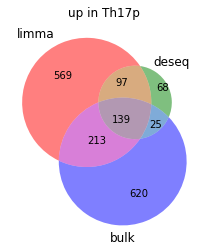

In [678]:
venn3(subsets = pvn_overlap[0], set_labels = pvn_overlap[1], alpha = 0.5)
plt.title('up in Th17p')

Text(0.5, 1.0, 'up in Th17n')

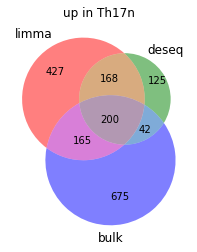

In [679]:
venn3(subsets = nvp_overlap[0], set_labels = nvp_overlap[1], alpha = 0.5)
plt.title('up in Th17n')